<a href="https://colab.research.google.com/github/muhammadhafiz27/Heart-Disease-Predictions/blob/main/Optimasi_Model_dan_Future_Enginering_pada_Prediksi_Penyakit_Jantung_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# **Load Dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muhammadhafiz27/Heart-Disease-Predictions/refs/heads/main/heart_processed.csv")
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1,fbs_1
0,0.937219,0.756938,-0.272801,0.019152,1.065587,0,1,True,False,False,True,False,False,False,False,False,False,False,True
1,-1.937566,-0.090680,0.054821,1.632621,2.096070,0,1,True,False,True,False,True,False,False,False,True,False,False,False
2,-1.495292,-0.090680,-0.831685,0.978512,0.292725,0,1,False,True,False,False,False,False,False,True,True,False,False,False
3,0.163238,-0.655759,-0.214985,1.240155,-0.222517,0,1,True,True,False,False,True,False,False,True,True,False,False,False
4,0.273807,-0.655759,2.059094,0.586046,-0.394264,0,1,False,False,False,False,True,False,False,True,True,False,True,False


# **Pisahkan Fitur dan Label**

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# **Split Dataset(Training dan Testing)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Random Forest Default**

In [ ]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
pred_default = rf_default.predict(X_test)

acc_def = accuracy_score(y_test, pred_default)
prec_def = precision_score(y_test, pred_default)
rec_def = recall_score(y_test, pred_default)
f1_def = f1_score(y_test, pred_default)

print("\n=== Random Forest Default ===")
print("Accuracy:", acc_def)
print("Precision:", prec_def)
print("Recall:", rec_def)
print("F1 Score:", f1_def)


=== Random Forest Default ===
Accuracy: 0.85
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426


# **Hyperparameter Tuning**

## **Inisialisasi Model Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)

## **Tentukan Parameter Grid**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

## **Lakukan Grid Search**

In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

## **Tampilkan Parameter Terbaik**

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


## **Evaluasi Model Setelah Tuning**

In [ ]:
y_pred = best_model.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred)
prec_tuned = precision_score(y_test, y_pred)
rec_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

print("\n=== Random Forest Tuned ===")
print("Accuracy:", acc_tuned)
print("Precision:", prec_tuned)
print("Recall:", rec_tuned)
print("F1 Score:", f1_tuned)


=== Random Forest Tuned ===
Accuracy: 0.85
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426


# **Feature Engineering(Feature Importance)**

## **Hitung Feature Importance**

In [ ]:
importances = best_model.feature_importances_
features_names = X.columns

fi_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi_df

,Feature,Importance
5,ca,0.148690
3,thalach,0.115058
4,oldpeak,0.102831
14,thal_2,0.099665
0,age,0.088398
2,chol,0.073589
15,thal_3,0.071867
1,trestbps,0.071856
6,sex_1,0.043426
8,cp_2,0.037297


## **Plot Feature Importance**

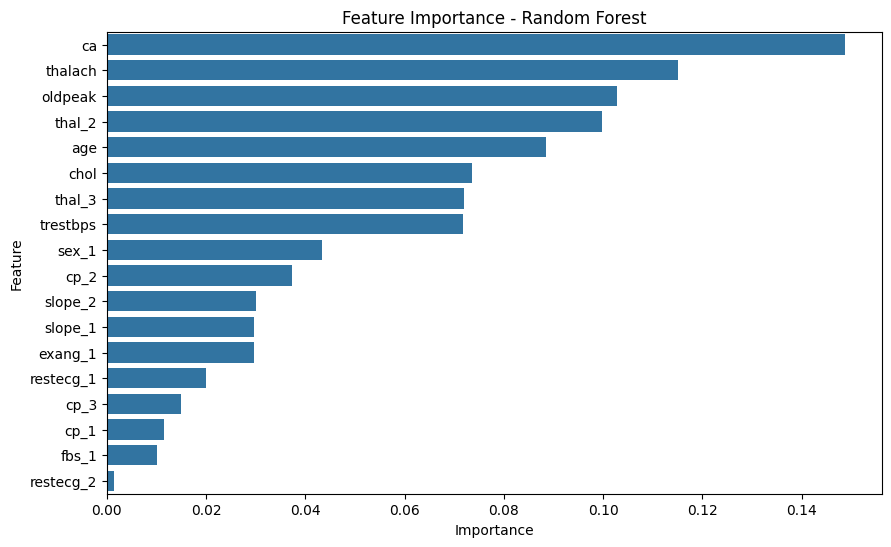

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance - Random Forest')
plt.show()

## **Melatih Ulang Menggunakan Fitur Terpenting (Top 5)**

In [ ]:
top5_features = fi_df['Feature'].head(5).tolist()
print("\nTop 5 Features:", top5_features)


Top 5 Features: ['ca', 'thalach', 'oldpeak', 'thal_2', 'age']


In [ ]:
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(X_train_top5, y_train)
pred_5 = rf_top5.predict(X_test_top5)

acc_5 = accuracy_score(y_test, pred_5)
prec_5 = precision_score(y_test, pred_5)
rec_5 = recall_score(y_test, pred_5)
f1_5 = f1_score(y_test, pred_5)

print("\n=== Random Forest (Top 5 Features) ===")
print("Accuracy:", acc_5)
print("Precision:", prec_5)
print("Recall:", rec_5)
print("F1 Score:", f1_5)


=== Random Forest (Top 5 Features) ===
Accuracy: 0.8666666666666667
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839


# **Print Tabel Perbandingan Model**

In [ ]:
results = pd.DataFrame({
    "Model": ["RF Default", "RF Tuned (GridSearchCV)", "RF Top 5 Features"],
    "Accuracy": [acc_def, acc_tuned, acc_5],
    "Precision": [prec_def, prec_tuned, prec_5],
    "Recall": [rec_def, rec_tuned, rec_5],
    "F1 Score": [f1_def, f1_tuned, f1_5]
})

print("\n=== Tabel Perbandingan Model ===")
results


=== Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1 Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968


# **Training Logistic Regression + Simpan Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

#Prediksi
pred_lr = logreg.predict(X_test)

#Evaluasi
acc_lr = accuracy_score(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

print("\n=== Logistic Regression(Baseline dari Praktikum 7) ===")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", rec_lr)
print("F1 Score:", f1_lr)

#save model
joblib.dump(logreg, 'logreg_heart_model.joblib')
print("\nModel Logistic Regression berhasil disimpan sebagai logreg_heart_model.joblib")


=== Logistic Regression(Baseline dari Praktikum 7) ===
Accuracy: 0.8833333333333333
Precision: 0.9032258064516129
Recall: 0.875
F1 Score: 0.8888888888888888

Model Logistic Regression berhasil disimpan sebagai logreg_heart_model.joblib


# **Ekplorasi Tambahan**

## **Randomized SearchCV (Random Forest)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10)
}

rand_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rand_search_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest - RandomizedSearchCV):", rand_search_rf.best_params_)
best_rf_rand = rand_search_rf.best_estimator_

Best Parameters (Random Forest - RandomizedSearchCV): {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 149}


## **Evaluasi**

In [ ]:
pred_rf_rand = best_rf_rand.predict(X_test)

acc_rf_rand = accuracy_score(y_test, pred_rf_rand)
prec_rf_rand = precision_score(y_test, pred_rf_rand)
rec_rf_rand = recall_score(y_test, pred_rf_rand)
f1_rf_rand = f1_score(y_test, pred_rf_rand)

print("\n=== Random Forest (Randomized SearchCV) ===")
print("Accuracy:", acc_rf_rand)
print("Precision:", prec_rf_rand)
print("Recall:", rec_rf_rand)
print("F1 Score:", f1_rf_rand)


=== Random Forest (Randomized SearchCV) ===
Accuracy: 0.8333333333333334
Precision: 0.8666666666666667
Recall: 0.8125
F1 Score: 0.8387096774193549


## **Randomized SearchCV (Logistic Regression)**

In [ ]:
from scipy.stats import uniform

logreg = LogisticRegression(max_iter=1000, random_state=42)

param_dist_lr = {
    'C': uniform(0.001, 10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'],
    'penalty': ['l2']
}

rand_search_lr = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist_lr,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rand_search_lr.fit(X_train, y_train)

print("Best Parameters (Logistic Regression - Randomized SearchCV):", rand_search_lr.best_params_)
best_lr = rand_search_lr.best_estimator_


Best Parameters (Logistic Regression - Randomized SearchCV): {'C': np.float64(0.34488521115218396), 'penalty': 'l2', 'solver': 'liblinear'}


## **Evaluasi**

In [ ]:
pred_lr_rand = best_lr.predict(X_test)

acc_lr_rand = accuracy_score(y_test, pred_lr_rand)
prec_lr_rand = precision_score(y_test, pred_lr_rand)
rec_lr_rand = recall_score(y_test, pred_lr_rand)
f1_lr_rand = f1_score(y_test, pred_lr_rand)

print("\n=== Logistic Regression (Randomized SearchCV) ===")
print("Accuracy:", acc_lr_rand)
print("Precision:", prec_lr_rand)
print("Recall:", rec_lr_rand)
print("F1 Score:", f1_lr_rand)


=== Logistic Regression (Randomized SearchCV) ===
Accuracy: 0.8833333333333333
Precision: 0.9032258064516129
Recall: 0.875
F1 Score: 0.8888888888888888


## **Hyperparameter Tuning Logistic Regression (Perbandingan)**

In [ ]:
print("\nPerbandingan Logistic Regression")
print("Sebelum Tuning (Baseline) — Accuracy:", acc_lr)
print("Setelah Tuning (Randomized SearchCV) — Accuracy:", acc_lr_rand)


Perbandingan Logistic Regression
Sebelum Tuning (Baseline) — Accuracy: 0.8833333333333333
Setelah Tuning (Randomized SearchCV) — Accuracy: 0.8833333333333333


## **Grafik Perbandingan Akurasi Antar Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy Decision Tree : ", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report : \n", classification_report(y_test, y_pred_dt))

Accuracy Decision Tree :  0.7333333333333333

Confusion Matrix : 
 [[19  9]
 [ 7 25]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.74      0.78      0.76        32

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



In [ ]:
accuracy_models = {
    "LR Default": acc_lr,
    "LR Tuned (RandSearch)": acc_lr_rand,
    "RF Default": acc_def,
    "RF Tuned (GridSearchCV)": acc_tuned,
    "RF Tuned (RandSearchCV)": acc_rf_rand,
    "RF Top 5 Features": acc_5,
    "Decision Tree": acc_dt
}

df_accuracy = pd.DataFrame(
    list(accuracy_models.items()),
    columns=["Model", "Accuracy"]
)

print(df_accuracy)

                     Model  Accuracy
0               LR Default  0.883333
1    LR Tuned (RandSearch)  0.883333
2               RF Default  0.850000
3  RF Tuned (GridSearchCV)  0.850000
4  RF Tuned (RandSearchCV)  0.833333
5        RF Top 5 Features  0.866667
6            Decision Tree  0.733333


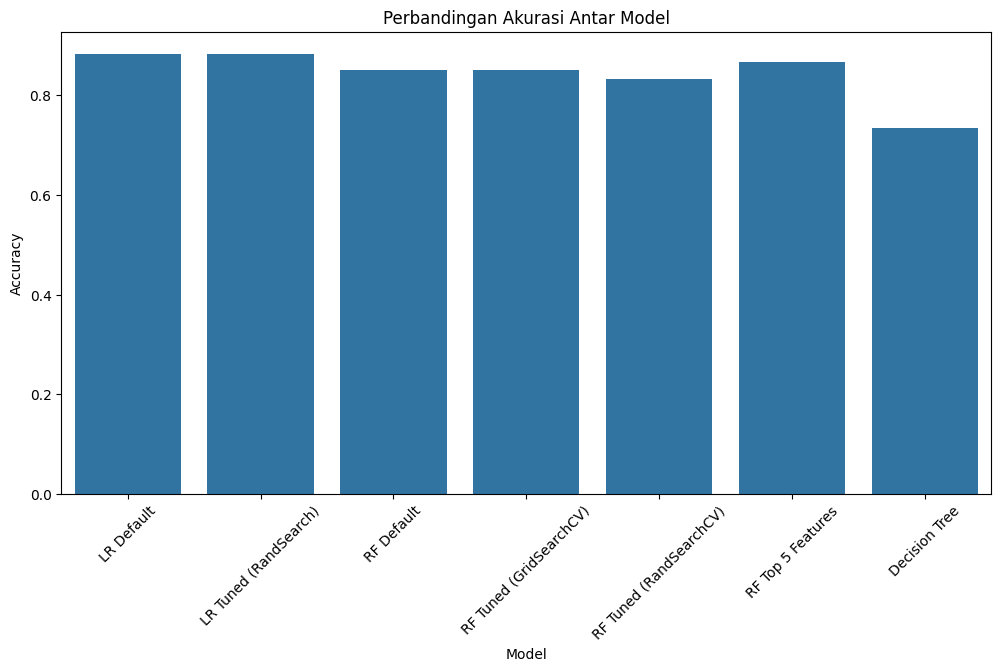

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(12,6))
sns.barplot(x=list(accuracy_models.keys()), y=list(accuracy_models.values()))
plt.xticks(rotation=45)
plt.title("Perbandingan Akurasi Antar Model")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

## **Penyimpanan Model**

In [ ]:
joblib.dump(best_lr, 'logreg_heart_model.joblib')
print("\nModel berhasil disimpan dengan nama: logreg_heart_model.joblib")


Model berhasil disimpan dengan nama: logreg_heart_model.joblib
